## 06-08 벡터와 행렬 연산

케라스는 사용하기가 편리해서 이런 고민을 할 일이 상대적으로 적지만, Numpy나 텐서플로우의 로우-레벨(low-level)의 머신 러닝 개발을 하게되면 각 변수들의 연산을 벡터와 행렬 연산으로 이해할 수 있어야 합니다. 다시 말해 사용자가 데이터와 변수의 개수로부터 행렬의 크기, 더 나아가 텐서의 크기를 산정할 수 있어야 합니다. 기본적인 벡터와 행렬 연산에 대해서 이해해보겠습니다.

### 벡터와 행렬과 텐서

1. 벡터: 리스트로 표현
2. 행렬: 2차원 배열로 표현
3. 텐서: 3차원 이상의 배열로 표현

### 텐서(Tensor)

인공 신경망은 복잡한 모델 내의 연산을 주로 행렬 연산을 통해 해결합니다. 그런데 여기서 말하는 행렬 연산이란 단순히 2차원 배열을 통한 행렬 연산만을 의미하는 것이 아닙니다. 머신 러닝의 입, 출력이 복잡해지면 3차원 텐서에 대한 이해가 필수로 요구됩니다. 

1. 0차원 텐서(스칼라)

스칼라는 하나의 실수값으로 이루어진 데이터를 말합니다. 이를 0차원 텐서라고 합니다. 차원을 영어로 Dimension이라고 하므로 0D 텐서라고도 합니다.

In [1]:
import numpy as np

d = np.array(5)
print('텐서의 차원 :',d.ndim) # 축의 개수/텐서의 차원
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


2. 1차원 텐서(벡터)

숫자를 배열한 것을 벡터라고합니다. 벡터는 1차원 텐서입니다. 주의할 점은 벡터에서도 차원이라는 용어를 쓰는데, 벡터의 차원과 텐서의 차원은 다른 개념이라는 점입니다. 아래의 예제는 4차원 벡터이지만, 1차원 텐서입니다. 1D 텐서라고도 합니다. (벡터에서의 차원은 하나의 축에 놓인 원소의 개수를 의미)

In [2]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


3. 2차원 텐서(행렬)

행과 열이 존재하는 벡터의 배열. 즉, 행렬(matrix)을 2차원 텐서라고 합니다. 2D 텐서라고도 합니다.

In [3]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


4. 3차원 텐서(다차원 배열)

행렬 또는 2차원 텐서를 단위로 한 번 더 배열하면 3차원 텐서라고 부릅니다. 3D 텐서라고도 합니다. 사실 위에서 언급한 0차원 ~ 2차원 텐서는 각각 스칼라, 벡터, 행렬이라고 해도 무방하므로 3차원 이상의 텐서부터 본격적으로 텐서라고 부릅니다. 데이터 사이언스 분야 한정으로 주로 3차원 이상의 배열을 텐서라고 부른다고 이해해도 좋습니다. 

In [4]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


자연어 처리에서 특히 자주 보게 되는 것이 이 3D 텐서입니다. 3D 텐서는 시퀀스 데이터(sequence data)를 표현할 때 자주 사용되기 때문입니다. 여기서 시퀀스 데이터는 주로 단어의 시퀀스를 의미하며, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트가 될 수 있습니다. 이 경우 3D 텐서는 (samples, timesteps, word_dim)이 됩니다. 또는 일괄로 처리하기 위해 데이터를 묶는 단위인 배치의 개념에 대해서 뒤에서 배울텐데 (batch_size, timesteps, word_dim)이라고도 볼 수 있습니다. samples 또는 batch_size는 샘플의 개수, timesteps는 시퀀스의 길이, word_dim은 단어를 표현하는 벡터의 차원을 의미합니다. 

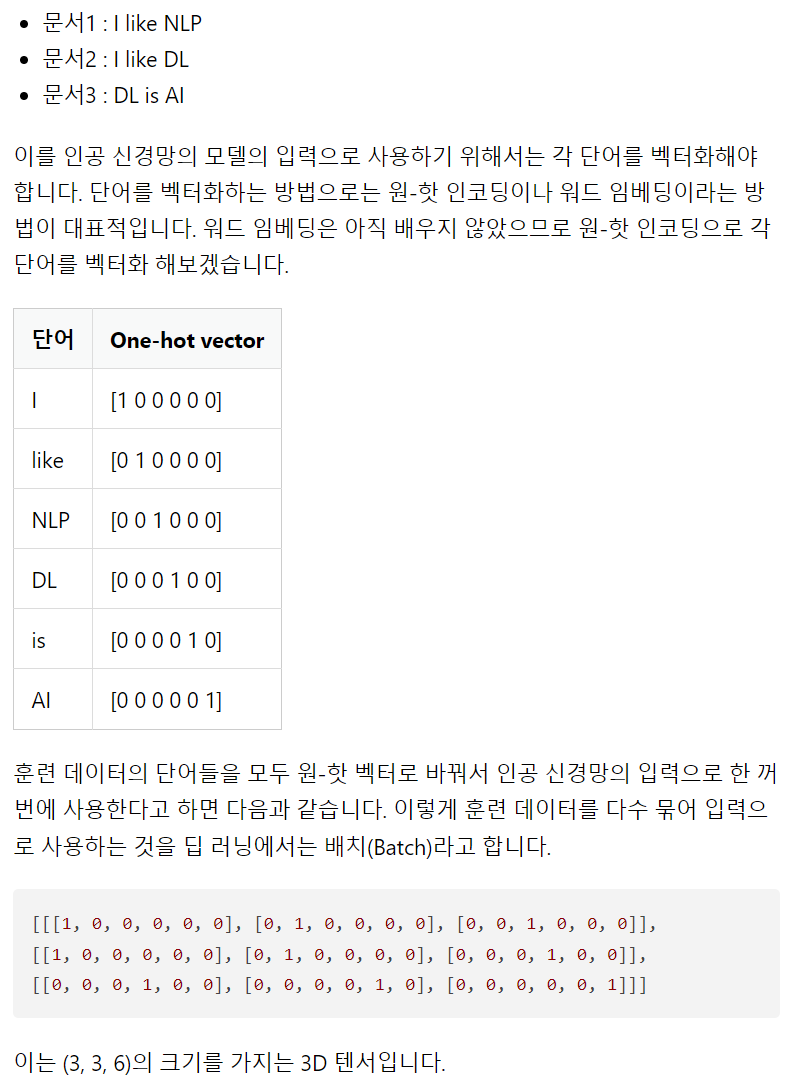

### 케라스에서의 텐서

앞서 Numpy로 각 텐서의 ndim(차원)과 shape(크기)를 출력했었습니다. 예를 들어 위의 예제에서는 3차원 텐서의 크기(shape)는 (2, 3, 5)였습니다. 케라스에서는 신경망의 층에 입력의 크기(shape)를 인자로 줄 때 input_shape라는 인자를 사용합니다. 실제 예시는 뒤 챕터들에서 보겠지만 input_shape는 배치 크기를 제외하고 차원을 지정하는데, 예를 들어 input_shape(6, 5)라는 인자값을 사용한다면 이 텐서의 크기는 (?, 6, 5)을 의미합니다. 배치 크기는 지정해주기 전까지는 알 수 없기때문에 ?가 됩니다. 만약 배치 크기까지 지정해주고 싶다면 batch_input_shape=(8, 2, 10)와 같이 인자를 주면 이 텐서의 크기는 (8, 2, 10)을 의미합니다.

### 벡터와 행렬의 연산

1. 벡터와 행렬의 덧셈과 뺄셈

In [5]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [6]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


2. 벡터의 내적과 행렬의 곱셈

In [7]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [8]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


### 다중 선형 회귀 행렬 연산으로 이해하기

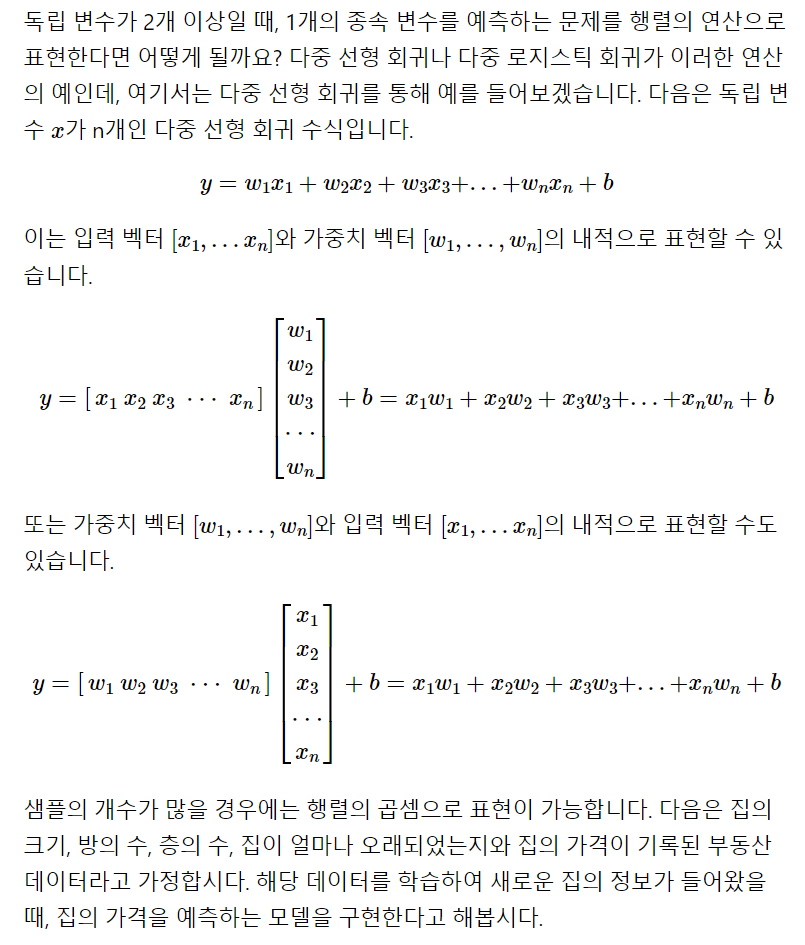

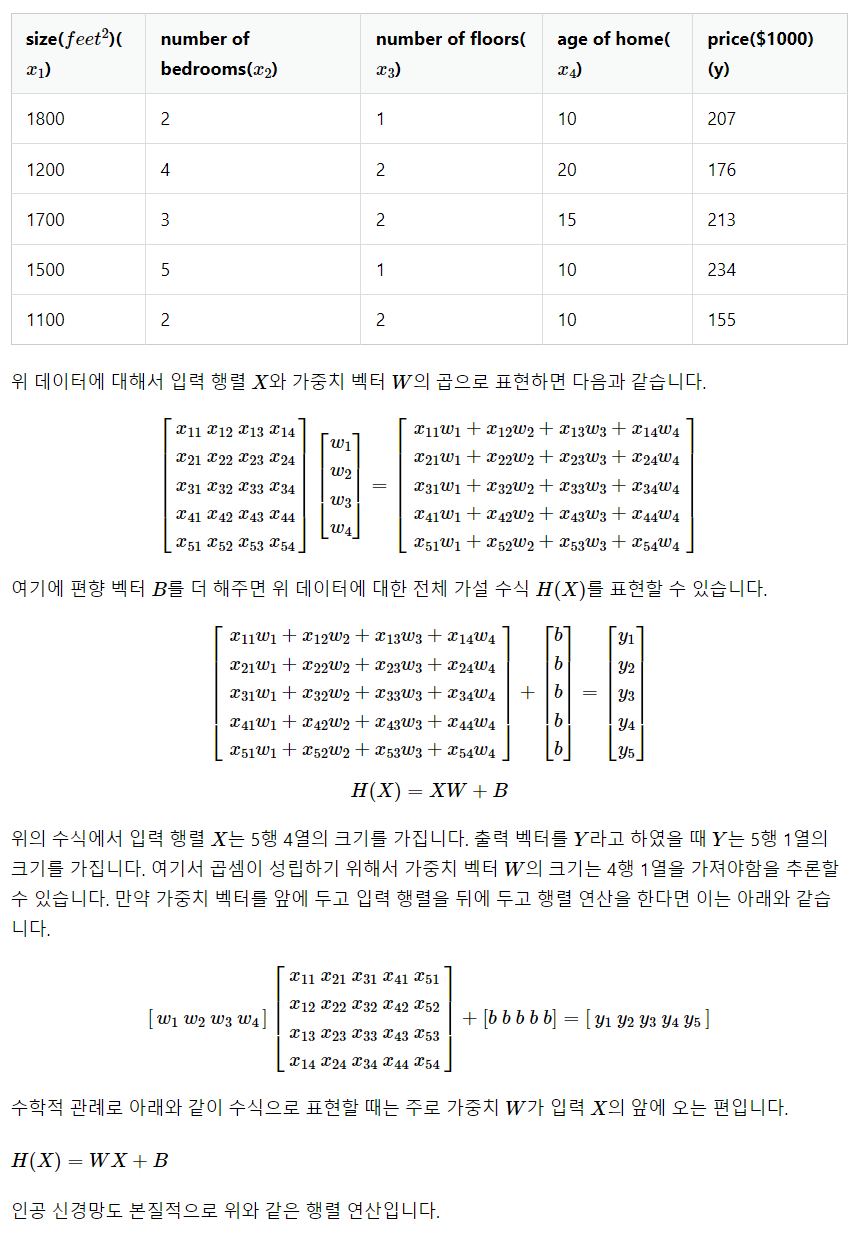

### 샘플(Sample)과 특성(Feature)

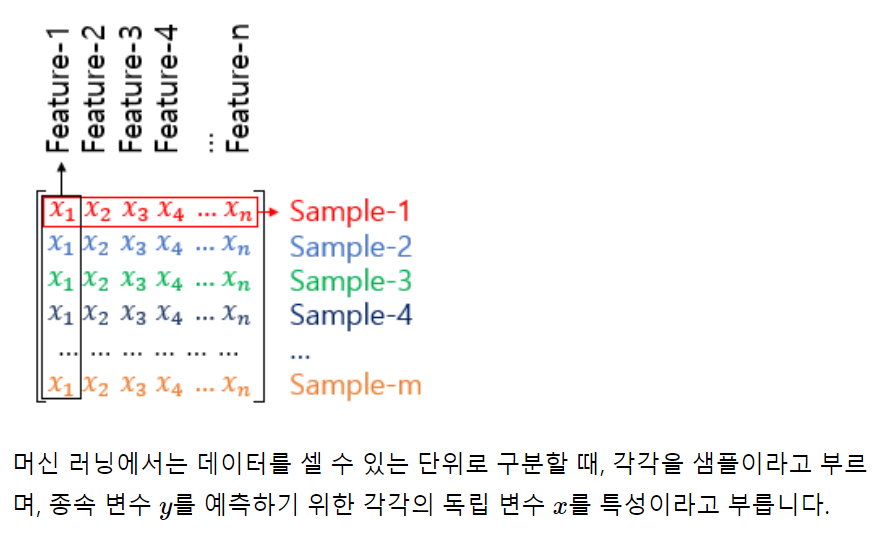